<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                380 non-null    object 
 1   Home team                           380 non-null    object 
 2   Away team                           380 non-null    object 
 3   Home goals                          380 non-null    int64  
 4   Away goals                          380 non-null    int64  
 5   Half time home goals                380 non-null    int64  
 6   Half time away goals                380 non-null    int64  
 7   Half time result                    380 non-null    object 
 8   Home shots                          380 non-null    int64  
 9   Away shots                          380 non-null    int64  
 10  Home shots on target                380 non-null    int64  
 11  Away shots on target                380 non-n

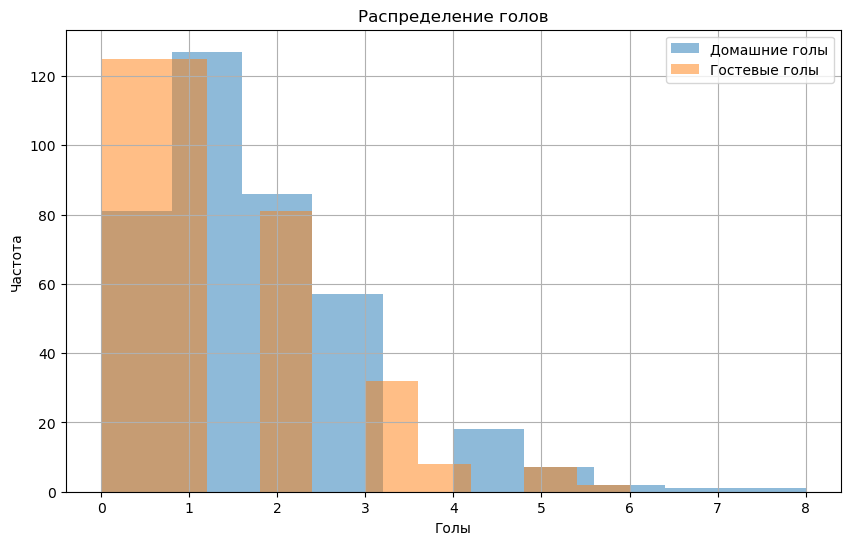

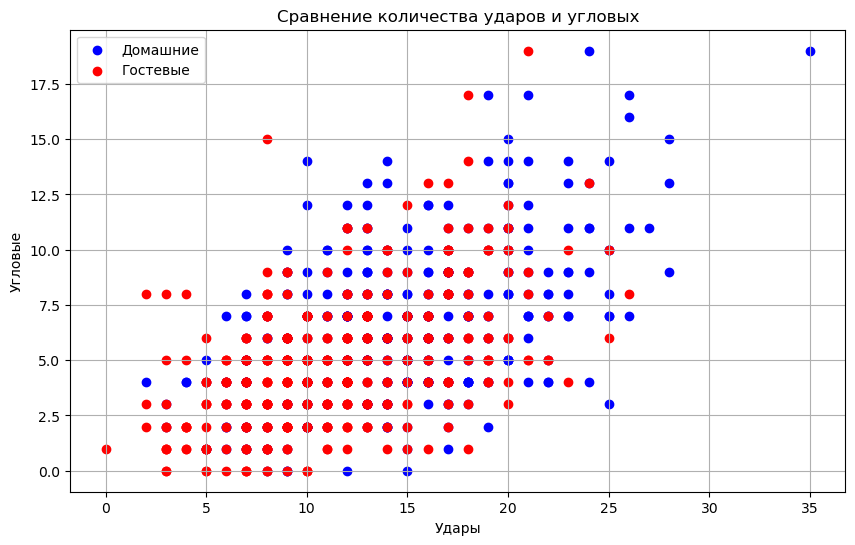

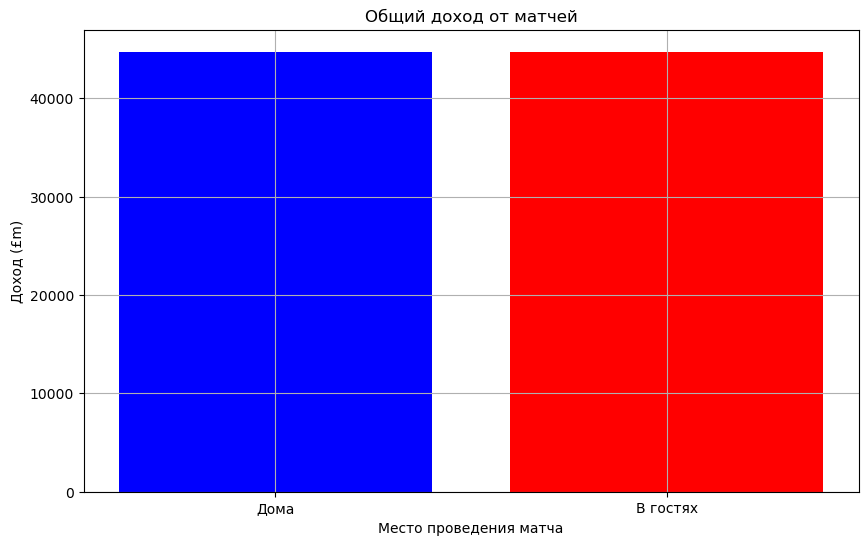

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data_epl = pd.read_csv("Football_English_Premier_League_11_12.csv")
print(data_epl.info())
print(data_epl.describe())
# Визуализация распределения голов
plt.figure(figsize=(10, 6))
plt.hist(data_epl['Home goals'], bins=10, alpha=0.5, label='Домашние голы')
plt.hist(data_epl['Away goals'], bins=10, alpha=0.5, label='Гостевые голы')
plt.title('Распределение голов')
plt.xlabel('Голы')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

# Сравнение количества ударов и угловых
plt.figure(figsize=(10, 6))
plt.scatter(data_epl['Home shots'], data_epl['Home corners'], color='blue', label='Домашние')
plt.scatter(data_epl['Away shots'], data_epl['Away corners'], color='red', label='Гостевые')
plt.title('Сравнение количества ударов и угловых')
plt.xlabel('Удары')
plt.ylabel('Угловые')
plt.legend()
plt.grid(True)
plt.show()
# Рассмотрим доходы от матчей для домашних и гостевых команд
income_columns = ['Home Gate and Matchday income (£m)', 'Away Gate and Matchday income (£m)',
                  'Home TV and Broadcasting (£m)', 'Away TV and Broadcasting (£m)',
                  'Home Commercial income (£m)', 'Away Commercial income (£m)']
total_income_home = data_epl['Home Turnover (£m)'].sum()
total_income_away = data_epl['Away Turnover (£m)'].sum()
# Визуализация доходов
plt.figure(figsize=(10, 6))
plt.bar(['Дома', 'В гостях'], [total_income_home, total_income_away], color=['blue', 'red'])
plt.title('Общий доход от матчей')
plt.xlabel('Место проведения матча')
plt.ylabel('Доход (£m)')
plt.grid(True)
plt.show()

In [2]:

# Преобразование столбца с датами в формат datetime
data_epl['Date'] = pd.to_datetime(data_epl['Date'], format='%Y-%m-%d')

# Количество матчей, сыгранных каждой командой дома и в гостях
home_matches = data_epl['Home team'].value_counts()
away_matches = data_epl['Away team'].value_counts()

print("Количество домашних матчей для каждой команды:")
print(home_matches)

print("\nКоличество гостевых матчей для каждой команды:")
print(away_matches)

Количество домашних матчей для каждой команды:
Blackburn Rovers           19
Fulham                     19
Manchester United          19
Wolverhampton Wanderers    19
Norwich City               19
Bolton Wanderers           19
Swansea City               19
Sunderland                 19
Everton                    19
Chelsea                    19
Aston Villa                19
Arsenal                    19
Manchester City            19
West Bromwich Albion       19
Stoke City                 19
Wigan Athletic             19
Queens Park Rangers        19
Newcastle United           19
Liverpool                  19
Tottenham Hotspur          19
Name: Home team, dtype: int64

Количество гостевых матчей для каждой команды:
Wolverhampton Wanderers    19
Aston Villa                19
Tottenham Hotspur          19
Fulham                     19
Stoke City                 19
Manchester City            19
Wigan Athletic             19
Newcastle United           19
Queens Park Rangers        19
West 

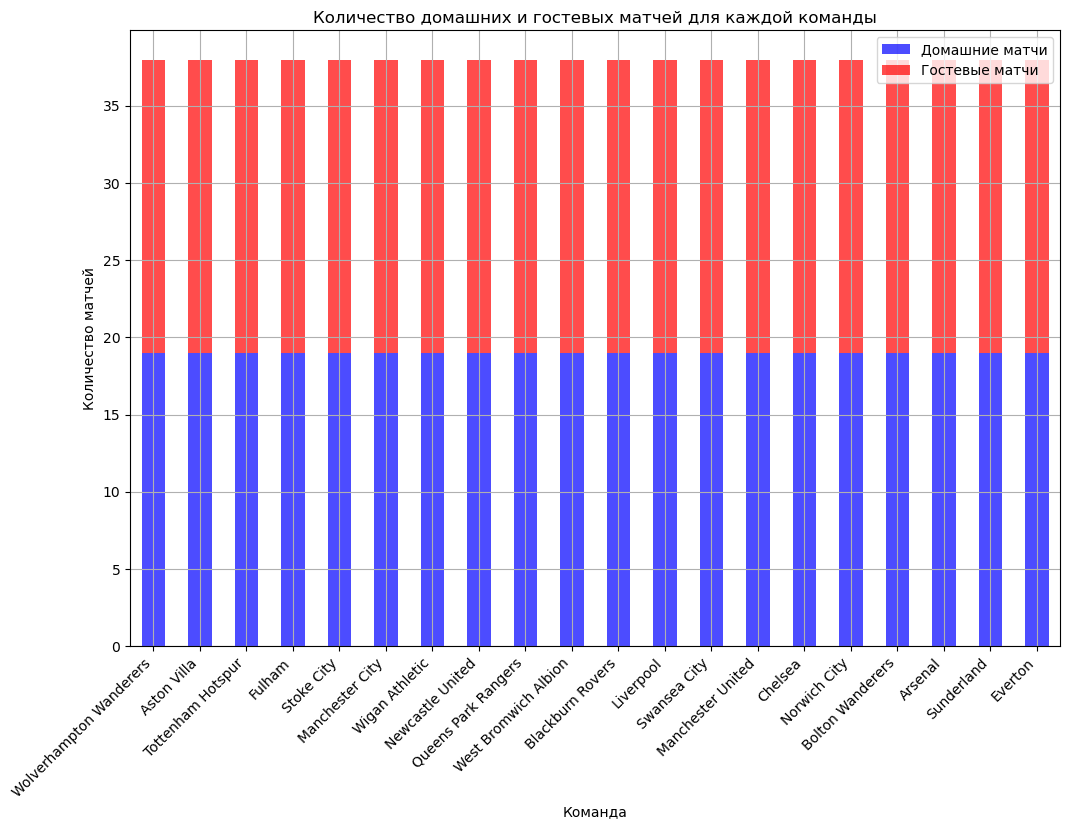

Распределение матчей по месяцам:
1     38
2     34
3     47
4     50
5     24
8     29
9     30
10    40
11    30
12    58
Name: Month, dtype: int64


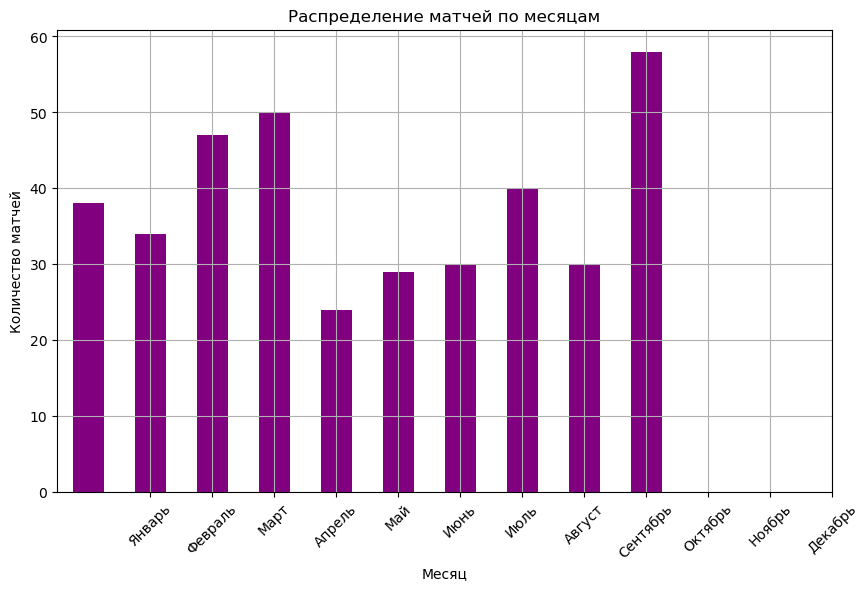

In [3]:
plt.figure(figsize=(12, 8))
home_matches.plot(kind='bar', color='blue', alpha=0.7, label='Домашние матчи')
away_matches.plot(kind='bar', color='red', alpha=0.7, label='Гостевые матчи', bottom=home_matches)
plt.title('Количество домашних и гостевых матчей для каждой команды')
plt.xlabel('Команда')
plt.ylabel('Количество матчей')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()

# Распределение матчей по месяцам
data_epl['Month'] = data_epl['Date'].dt.month
matches_per_month = data_epl['Month'].value_counts().sort_index()

print("Распределение матчей по месяцам:")
print(matches_per_month)

# Визуализация распределения матчей по месяцам
plt.figure(figsize=(10, 6))
matches_per_month.plot(kind='bar', color='purple')
plt.title('Распределение матчей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество матчей')
plt.xticks(ticks=range(1, 13), labels=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 
                                       'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'], rotation=45)
plt.grid(True)
plt.show()


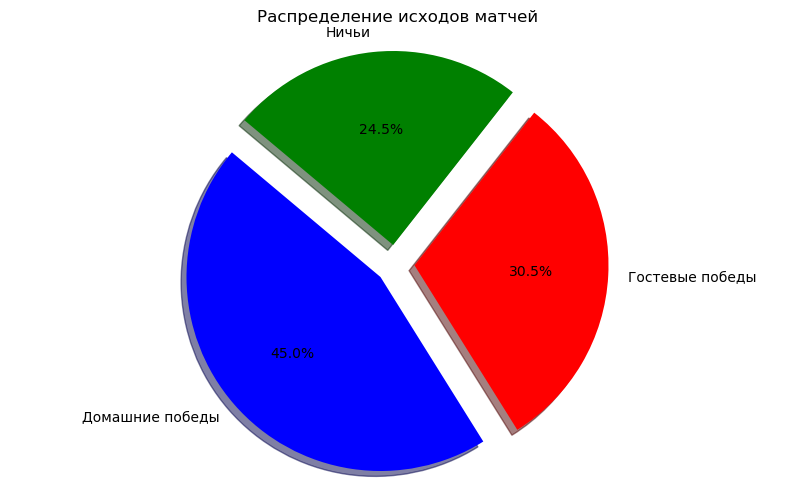

In [4]:
# Подсчет побед, ничьих и поражений
home_wins = data_epl[data_epl['Home goals'] > data_epl['Away goals']].shape[0]
away_wins = data_epl[data_epl['Home goals'] < data_epl['Away goals']].shape[0]
draws = data_epl[data_epl['Home goals'] == data_epl['Away goals']].shape[0]

# Визуализация
plt.figure(figsize=(10, 6))
labels = ['Домашние победы', 'Гостевые победы', 'Ничьи']
sizes = [home_wins, away_wins, draws]
colors = ['blue', 'red', 'green']
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Распределение исходов матчей')
plt.axis('equal')
plt.show()

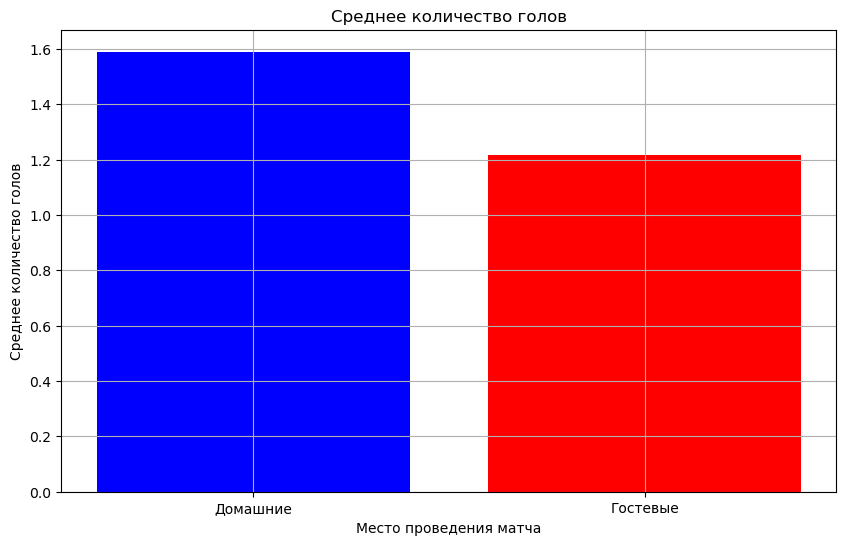

In [5]:
# Среднее количество голов
mean_home_goals = data_epl['Home goals'].mean()
mean_away_goals = data_epl['Away goals'].mean()

# Визуализация
plt.figure(figsize=(10, 6))
plt.bar(['Домашние', 'Гостевые'], [mean_home_goals, mean_away_goals], color=['blue', 'red'])
plt.title('Среднее количество голов')
plt.xlabel('Место проведения матча')
plt.ylabel('Среднее количество голов')
plt.grid(True)
plt.show()
if 'Home first half goals' in data_epl.columns and 'Home second half goals' in data_epl.columns:
    home_first_half_goals = data_epl['Home first half goals'].sum()
    home_second_half_goals = data_epl['Home second half goals'].sum()
    away_first_half_goals = data_epl['Away first half goals'].sum()
    away_second_half_goals = data_epl['Away second half goals'].sum()
    
    # Визуализация
    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    index = np.arange(2)

    bar1 = plt.bar(index, [home_first_half_goals, away_first_half_goals], bar_width, color='blue')

Общее количество красных карточек за сезон (дома): 25
Общее количество красных карточек за сезон (в гостях): 39


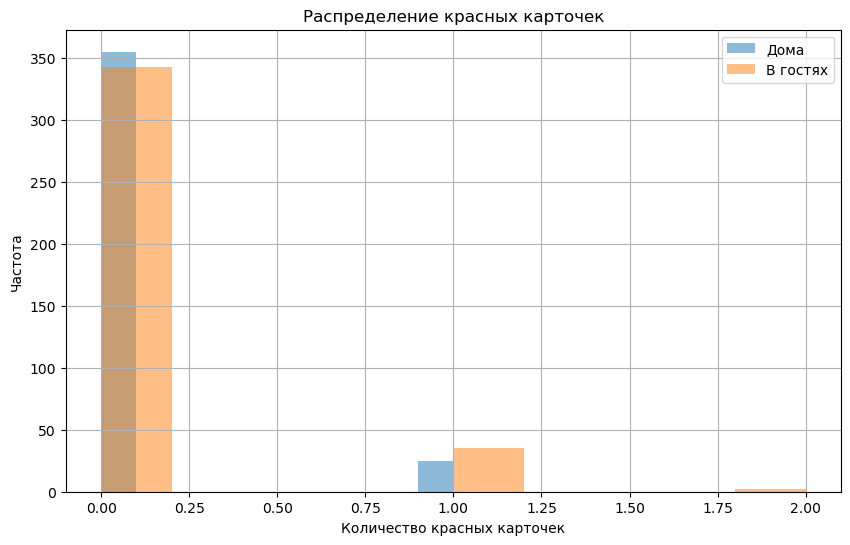

In [6]:
if 'Home red cards' in data_epl.columns:
    # Общее количество красных карточек за сезон
    total_home_red_cards = data_epl['Home red cards'].sum()
    total_away_red_cards = data_epl['Away red cards'].sum()

    print("Общее количество красных карточек за сезон (дома):", total_home_red_cards)
    print("Общее количество красных карточек за сезон (в гостях):", total_away_red_cards)

    # Визуализация распределения красных карточек
    plt.figure(figsize=(10, 6))
    plt.hist(data_epl['Home red cards'], bins=10, alpha=0.5, label='Дома')
    plt.hist(data_epl['Away red cards'], bins=10, alpha=0.5, label='В гостях')
    plt.title('Распределение красных карточек')
    plt.xlabel('Количество красных карточек')
    plt.ylabel('Частота')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Столбец 'Home red cards' отсутствует в наборе данных.")

Количество побед каждой команды за сезон:
Manchester United          28
Manchester City            28
Arsenal                    21
Tottenham Hotspur          20
Newcastle United           19
Chelsea                    18
Everton                    15
Fulham                     14
Liverpool                  14
West Bromwich Albion       13
Swansea City               12
Norwich City               12
Sunderland                 11
Wigan Athletic             11
Stoke City                 11
Bolton Wanderers           10
Queens Park Rangers        10
Blackburn Rovers            8
Aston Villa                 7
Wolverhampton Wanderers     5
Name: Winner Team, dtype: int64


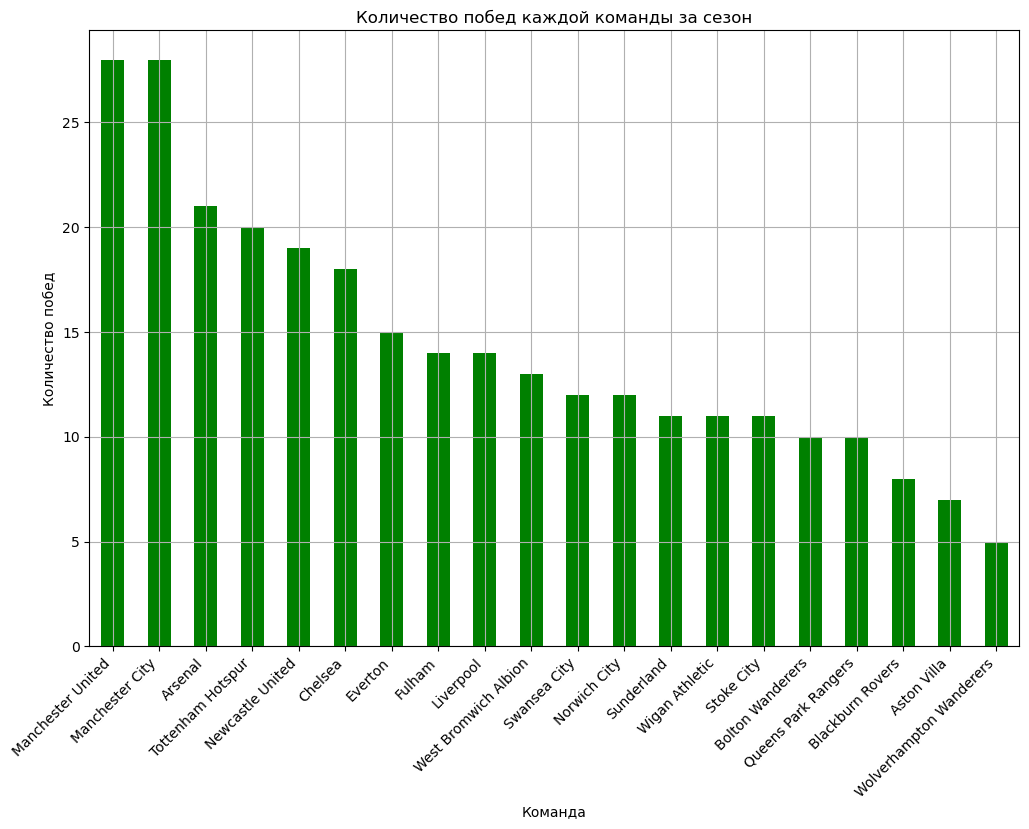

Распределение победителей матчей (дома, в гостях, ничья):
Home    171
Away    116
Draw     93
Name: Winner, dtype: int64


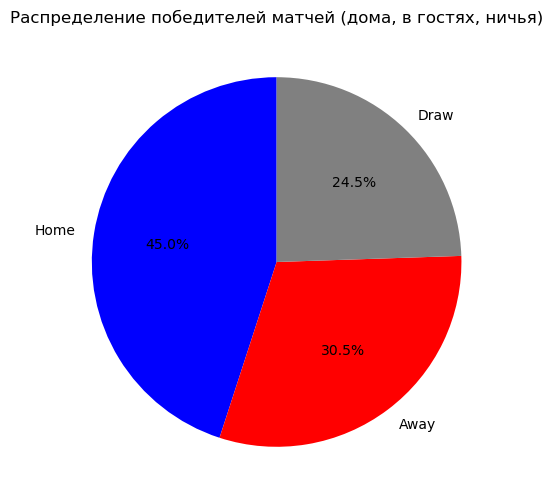

In [7]:
if 'Winner' in data_epl.columns and 'Winner Team' in data_epl.columns:
    # Общее количество побед для каждой команды
    winner_counts = data_epl['Winner Team'].value_counts()

    print("Количество побед каждой команды за сезон:")
    print(winner_counts)

    # Визуализация количества побед каждой команды
    plt.figure(figsize=(12, 8))
    winner_counts.plot(kind='bar', color='green')
    plt.title('Количество побед каждой команды за сезон')
    plt.xlabel('Команда')
    plt.ylabel('Количество побед')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()

    # Распределение победителей матчей (дома, в гостях, ничья)
    winner_distribution = data_epl['Winner'].value_counts()

    print("Распределение победителей матчей (дома, в гостях, ничья):")
    print(winner_distribution)

    # Визуализация распределения победителей матчей
    plt.figure(figsize=(10, 6))
    winner_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', 'red', 'grey'])
    plt.title('Распределение победителей матчей (дома, в гостях, ничья)')
    plt.ylabel('')
    plt.show()
else:
    print("Необходимые столбцы отсутствуют в наборе данных.")

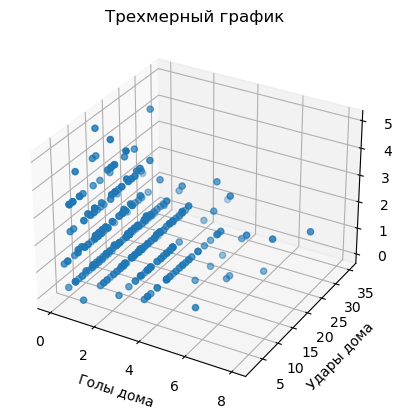

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Выбираем данные для отображения на осях
x = data_epl['Home goals']
y = data_epl['Home shots']
z = data_epl['Home yellow cards']

# Создаем трехмерное пространство для построения графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение трехмерного графика
ax.scatter(x, y, z)

# Настройка меток и заголовка
ax.set_xlabel('Голы дома')
ax.set_ylabel('Удары дома')
ax.set_zlabel('Желтые карточки дома')
ax.set_title('Трехмерный график')

plt.show()

In [9]:
# Преобразование столбца с датами в формат datetime
data_epl['Date'] = pd.to_datetime(data_epl['Date'], format='%Y-%m-%d')

# Информация о данных
print(data_epl.info())

# Описательная статистика
print(data_epl.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                380 non-null    datetime64[ns]
 1   Home team                           380 non-null    object        
 2   Away team                           380 non-null    object        
 3   Home goals                          380 non-null    int64         
 4   Away goals                          380 non-null    int64         
 5   Half time home goals                380 non-null    int64         
 6   Half time away goals                380 non-null    int64         
 7   Half time result                    380 non-null    object        
 8   Home shots                          380 non-null    int64         
 9   Away shots                          380 non-null    int64         
 10  Home shots on target      

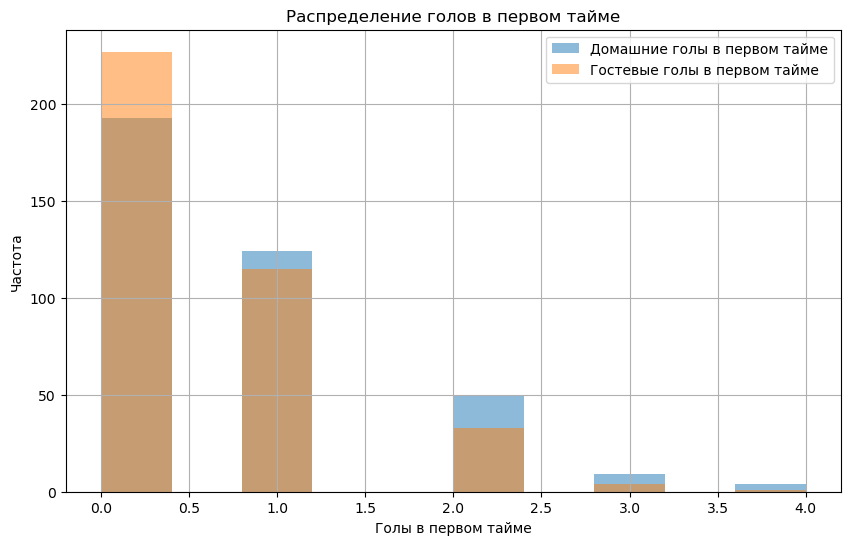

In [10]:
# Визуализация распределения голов в первом тайме
plt.figure(figsize=(10, 6))
plt.hist(data_epl['Half time home goals'], bins=10, alpha=0.5, label='Домашние голы в первом тайме')
plt.hist(data_epl['Half time away goals'], bins=10, alpha=0.5, label='Гостевые голы в первом тайме')
plt.title('Распределение голов в первом тайме')
plt.xlabel('Голы в первом тайме')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

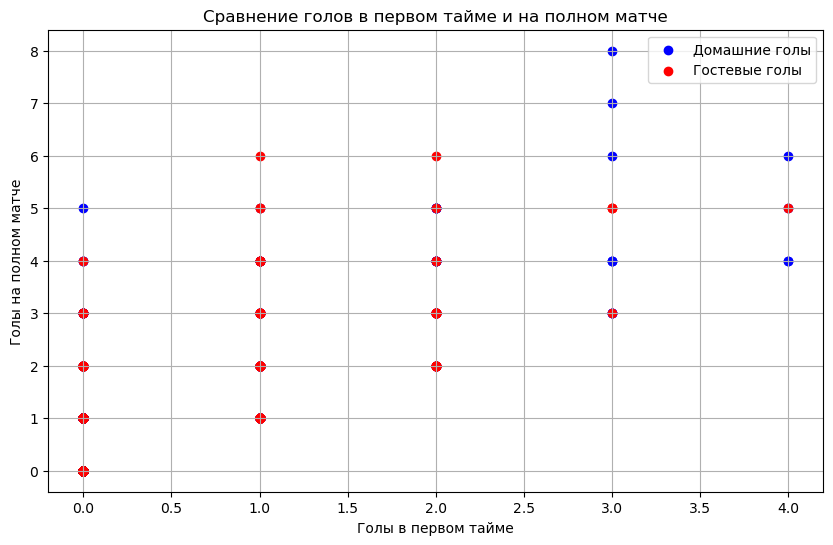

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(data_epl['Half time home goals'], data_epl['Home goals'], color='blue', label='Домашние голы')
plt.scatter(data_epl['Half time away goals'], data_epl['Away goals'], color='red', label='Гостевые голы')
plt.title('Сравнение голов в первом тайме и на полном матче')
plt.xlabel('Голы в первом тайме')
plt.ylabel('Голы на полном матче')
plt.legend()
plt.grid(True)
plt.show()

Результаты на половине матча:
Draw    157
Home    130
Away     93
Name: Half time result, dtype: int64


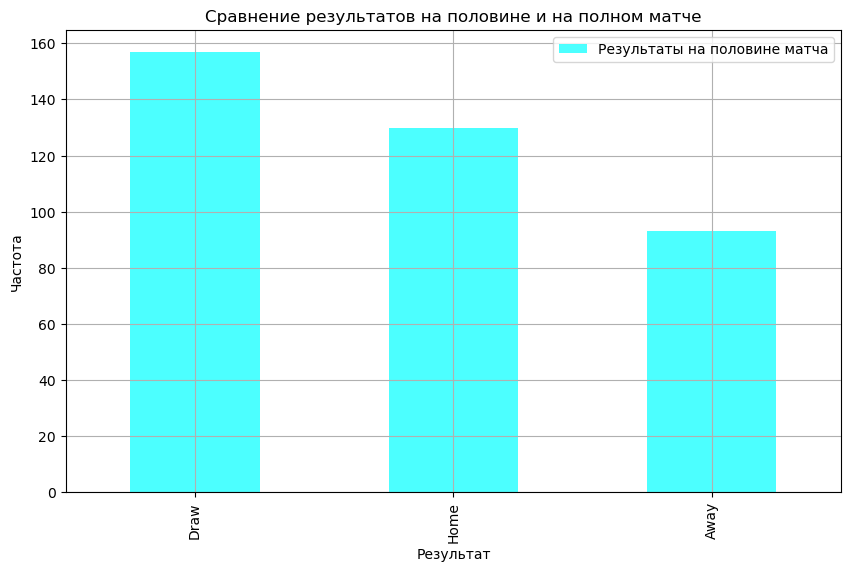

In [12]:
# Анализ результатов на половине и на полном матче
half_time_results = data_epl['Half time result'].value_counts()

print("Результаты на половине матча:")
print(half_time_results)
# Визуализация результатов на половине и на полном матче
plt.figure(figsize=(10, 6))
half_time_results.plot(kind='bar', color='cyan', alpha=0.7, label='Результаты на половине матча')
plt.title('Сравнение результатов на половине и на полном матче')
plt.xlabel('Результат')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
total_matches = len(data_epl)
total_home_wins = len(data_epl[data_epl['Winner'] == 'Home'])
total_away_wins = len(data_epl[data_epl['Winner'] == 'Away'])
total_draws = len(data_epl[data_epl['Winner'] == 'Draw'])

# 2. Средний и медианный результаты по голам, ударам и угловым
avg_home_goals = data_epl['Home goals'].mean()
avg_away_goals = data_epl['Away goals'].mean()
median_home_goals = data_epl['Home goals'].median()
median_away_goals = data_epl['Away goals'].median()

avg_home_shots = data_epl['Home shots'].mean()
avg_away_shots = data_epl['Away shots'].mean()
median_home_shots = data_epl['Home shots'].median()
median_away_shots = data_epl['Away shots'].median()

avg_home_corners = data_epl['Home corners'].mean()
avg_away_corners = data_epl['Away corners'].mean()
median_home_corners = data_epl['Home corners'].median()
median_away_corners = data_epl['Away corners'].median()

# 3. Общие доходы от матчей для домашних и гостевых команд
total_home_income = data_epl['Home Turnover (£m)'].sum()
total_away_income = data_epl['Away Turnover (£m)'].sum()

# 4. Корреляция между различными параметрами, например, между количеством голов и количеством ударов
goal_shots_corr = data_epl['Home goals'].corr(data_epl['Home shots'])

# 5. Анализ результатов на половине и на полном матче
half_time_results = data_epl['Half time result'].value_counts()
total_home_yellow_cards = data_epl['Home yellow cards'].sum()
total_away_yellow_cards = data_epl['Away yellow cards'].sum()
total_home_red_cards = data_epl['Home red cards'].sum()
total_away_red_cards = data_epl['Away red cards'].sum()

# 6.2. Среднее количество ударов в створ ворот
avg_home_shots_on_target = data_epl['Home shots on target'].mean()
avg_away_shots_on_target = data_epl['Away shots on target'].mean()

# 6.3. Общая коммерческая выручка
total_home_commercial_income = data_epl['Home Commercial income (£m)'].sum()
total_away_commercial_income = data_epl['Away Commercial income (£m)'].sum()

# 6.4. Победитель
winner_counts = data_epl['Winner'].value_counts()

# 6.5. Победитель по командам
winner_team_counts = data_epl['Winner Team'].value_counts()

# Вывод результатов
print("Общее количество желтых карточек:")
print(" - Домашние команды:", total_home_yellow_cards)
print(" - Гостевые команды:", total_away_yellow_cards)

print("Общее количество красных карточек:")
print(" - Домашние команды:", total_home_red_cards)
print(" - Гостевые команды:", total_away_red_cards)

print("Среднее количество ударов в створ ворот:")
print(" - Домашние команды:", avg_home_shots_on_target)
print(" - Гостевые команды:", avg_away_shots_on_target)

print("Общая коммерческая выручка:")
print(" - Домашние команды:", total_home_commercial_income)
print(" - Гостевые команды:", total_away_commercial_income)

print("Статистика победителей:")
print(winner_counts)

print("Статистика побед по командам:")
print(winner_team_counts)

print("Общее количество матчей:", total_matches)

print("Количество побед:")
print(" - Домашние команды:", total_home_wins)
print(" - Гостевые команды:", total_away_wins)

print("Количество ничьих:", total_draws)

print("Среднее количество голов:")
print(" - Домашние команды:", avg_home_goals)
print(" - Гостевые команды:", avg_away_goals)

Общее количество желтых карточек:
 - Домашние команды: 523
 - Гостевые команды: 655
Общее количество красных карточек:
 - Домашние команды: 25
 - Гостевые команды: 39
Среднее количество ударов в створ ворот:
 - Домашние команды: 8.194736842105263
 - Гостевые команды: 6.478947368421053
Общая коммерческая выручка:
 - Домашние команды: 9576.0
 - Гостевые команды: 9576.0
Статистика победителей:
Home    171
Away    116
Draw     93
Name: Winner, dtype: int64
Статистика побед по командам:
Manchester United          28
Manchester City            28
Arsenal                    21
Tottenham Hotspur          20
Newcastle United           19
Chelsea                    18
Everton                    15
Fulham                     14
Liverpool                  14
West Bromwich Albion       13
Swansea City               12
Norwich City               12
Sunderland                 11
Wigan Athletic             11
Stoke City                 11
Bolton Wanderers           10
Queens Park Rangers        10
Bla

In [14]:
# Создаем HTML-страницу с результатами анализа
html_page = """
<!DOCTYPE html>
<html lang="ru">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Результаты анализа футбольных данных</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
        }}
        table {{
            width: 100%;
            border-collapse: collapse;
            margin-top: 20px;
        }}
        th, td {{
            border: 1px solid #dddddd;
            text-align: left;
            padding: 8px;
        }}
        th {{
            background-color: #f2f2f2;
        }}
        img {{
            display: block;
            margin: 20px auto;
        }}
    </style>
</head>
<body>
    <h1>Результаты анализа футбольных данных</h1>
    <p>Ниже представлены результаты анализа данных футбольных матчей:</p>

    <!-- Вставка изображения -->
    <img src="seitiropremier_th001.jpg" alt="Логотип Премьер-лиги" width="150" height="100">

    <!-- Таблица с данными -->
    <table>
        <tr>
            <th>Показатель</th>
            <th>Значение</th>
        </tr>
        <tr>
            <td>Общее количество желтых карточек (домашние)</td>
            <td>{total_home_yellow_cards}</td>
        </tr>
        <tr>
            <td>Общее количество желтых карточек (гостевые)</td>
            <td>{total_away_yellow_cards}</td>
        </tr>
        <tr>
            <td>Общее количество красных карточек (домашние)</td>
            <td>{total_home_red_cards}</td>
        </tr>
        <tr>
            <td>Общее количество красных карточек (гостевые)</td>
            <td>{total_away_red_cards}</td>
        </tr>
        <tr>
            <td>Среднее количество ударов в створ ворот (домашние)</td>
            <td>{avg_home_shots_on_target}</td>
        </tr>
        <tr>
            <td>Среднее количество ударов в створ ворот (гостевые)</td>
            <td>{avg_away_shots_on_target}</td>
        </tr>
        <tr>
            <td>Общая коммерческая выручка (домашние)</td>
            <td>{total_home_commercial_income}</td>
        </tr>
        <tr>
            <td>Общая коммерческая выручка (гостевые)</td>
            <td>{total_away_commercial_income}</td>
        </tr>
        <tr>
            <td>Общее количество побед (домашние)</td>
            <td>{total_home_wins}</td>
        </tr>
        <tr>
            <td>Общее количество побед (гостевые)</td>
            <td>{total_away_wins}</td>
        </tr>
        <tr>
            <td>Общее количество ничьих</td>
            <td>{total_draws}</td>
        </tr>
        <tr>
            <td>Среднее количество голов (домашние)</td>
            <td>{avg_home_goals}</td>
        </tr>
        <tr>
            <td>Среднее количество голов (гостевые)</td>
            <td>{avg_away_goals}</td>
        </tr>
    </table>
</body>
</html>
"""

# Заполнение HTML-страницы данными
formatted_page = html_page.format(
    total_home_yellow_cards=total_home_yellow_cards,
    total_away_yellow_cards=total_away_yellow_cards,
    total_home_red_cards=total_home_red_cards,
    total_away_red_cards=total_away_red_cards,
    avg_home_shots_on_target=avg_home_shots_on_target,
    avg_away_shots_on_target=avg_away_shots_on_target,
    total_home_commercial_income=total_home_commercial_income,
    total_away_commercial_income=total_away_commercial_income,
    total_home_wins=total_home_wins,
    total_away_wins=total_away_wins,
    total_draws=total_draws,
    avg_home_goals=avg_home_goals,
    avg_away_goals=avg_away_goals
)

# Сохраняем HTML-страницу в файл
with open('football_analysis_results.html', 'w') as file:
    file.write(formatted_page)


In [15]:
from IPython.display import HTML

with open('football_analysis_results.html', 'r') as file:
    html_content = file.read()

HTML(html_content)

Показатель,Значение
Общее количество желтых карточек (домашние),523
Общее количество желтых карточек (гостевые),655
Общее количество красных карточек (домашние),25
Общее количество красных карточек (гостевые),39
Среднее количество ударов в створ ворот (домашние),8.194736842105263
Среднее количество ударов в створ ворот (гостевые),6.478947368421053
Общая коммерческая выручка (домашние),9576.0
Общая коммерческая выручка (гостевые),9576.0
Общее количество побед (домашние),171
Общее количество побед (гостевые),116
